In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler 

In [3]:
df = pd.read_csv("C:/Users/lesin/Documents/Python Projects/Jupytor/Employee.csv")

In [5]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [11]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
# Data Exploration

In [17]:
# List down the unique values in each feature and find its length.

In [26]:
for column in df.columns:
    unique_val = df[column].unique()
    print(f"feature: {column}")
    print(f"Unique values ({len(unique_val)}): {unique_val}")

feature: company
Unique values (7): ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
feature: age
Unique values (30): [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
feature: salary
Unique values (41): [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
feature: place
Unique values (12): ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
feature: country
Unique values (1): ['India']
feature: gender
Unique values (2): [0 1]


In [24]:
# Perform the statistical analysis and renaming of the columns.

In [28]:
print("statistical Summary : ")
print(df.describe(include = 'all'))
# renaming the column
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
print("Renamed columns:", df.columns)

statistical Summary : 
       company         age       salary   place country      gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000
Renamed columns: Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')


In [30]:
# Data Cleaning

In [32]:
# checking for missing values
print("Missing values before cleaning:", df.isnull().sum())
# replacing with 0 in age column (age)
df['age'] = df['age'].replace(0,np.nan)
# checking after replacement
print ("Missing values after replacing 0 with NaN:",df.isnull().sum())

Missing values before cleaning: company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64
Missing values after replacing 0 with NaN: company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64


In [34]:
# Removing duplicate values(rows)
df = df.drop_duplicates()

In [36]:
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
# Treat missing values

In [47]:
# Numerical columns: fill with mean or median
data = df.copy()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    median_val = df[col].median()
    data[col] = df[col].fillna(median_val)

In [49]:
# Categorical columns: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode_val = df[col].mode()[0]
    data[col] = df[col].fillna(mode_val)

In [51]:
# Find outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(data[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"\nOutliers in {col}: {outliers.shape[0]}")


Outliers in age: 0

Outliers in salary: 0

Outliers in gender: 32


In [53]:
# Data Analysis

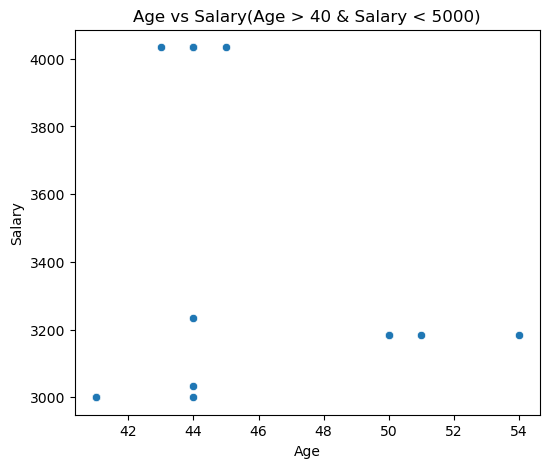

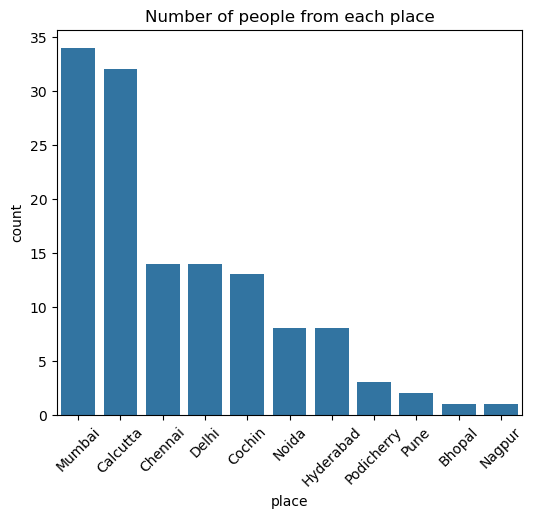

In [59]:
# filter:Age> 40 and salary<5000
filtered_data = df[(df['age']> 40) & (df['salary'] < 5000)]

# Age Vs Salary(plot)
plt.figure(figsize = (6,5))
sns.scatterplot(x=filtered_data['age'], y=filtered_data['salary'])
plt.title('Age vs Salary(Age > 40 & Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

place_counts = df['place'].value_counts()

# bar plot for count and place
plt.figure(figsize = (6,5))
sns.barplot(x=place_counts.index, y = place_counts.values)
plt.xticks(rotation=45)
plt.title('Number of people from each place')
plt.xlabel('place')
plt.ylabel('count')
plt.show()    

In [61]:
# Data Encoding

In [63]:
#label encoding for simple categorical columns
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])
print("Data after Encoding:")
print(df.head())

Data after Encoding:
   company   age  salary  place  country  gender
0        4  20.0     NaN      2        0       0
1        2  30.0     NaN      6        0       0
2        4  35.0  2300.0      1        0       0
3        2  40.0  3000.0      4        0       0
4        4  23.0  4000.0      6        0       0


C:\Users\lesin\AppData\Local\Temp\ipykernel_29124\3587882411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col])
C:\Users\lesin\AppData\Local\Temp\ipykernel_29124\3587882411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col])
C:\Users\lesin\AppData\Local\Temp\ipykernel_29124\3587882411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [65]:
# Feature Scaling

In [67]:
standard_scaler =  StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns= df.columns)

minmax_scaler =  MinMaxScaler()
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df), columns = df.columns)

print("Standard Scaled data Sample:", data_standard_scaled.head())
print("Minmax Scaled Data Sample:", data_minmax_scaled.head())  

Standard Scaled data Sample:     company       age    salary     place  country    gender
0  0.837436 -1.345094       NaN -0.845693      0.0 -0.534522
1 -0.279145 -0.228029       NaN  0.426159      0.0 -0.534522
2  0.837436  0.330504 -1.158779 -1.163656      0.0 -0.534522
3 -0.279145  0.889036 -0.886899 -0.209767      0.0 -0.534522
4  0.837436 -1.009975 -0.498500  0.426159      0.0 -0.534522
Minmax Scaled Data Sample:     company       age    salary     place  country  gender
0  0.666667  0.081081       NaN  0.181818      0.0     0.0
1  0.333333  0.351351       NaN  0.545455      0.0     0.0
2  0.666667  0.486486  0.137817  0.090909      0.0     0.0
3  0.333333  0.621622  0.217480  0.363636      0.0     0.0
4  0.666667  0.162162  0.331285  0.545455      0.0     0.0
